In [1]:
# https://frhyme.github.io/machine-learning/regression_using_keras/

In [5]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD , Adam , Ftrl
from keras import metrics

from sklearn.metrics import r2_score

# if any error raise put tensorflow in the begining of keras

In [8]:
# data generation
sample_size = 500

x = np.random.uniform(-15, 15, sample_size) 
y = x**4 + x**3 + x + np.random.normal(0,2, sample_size)

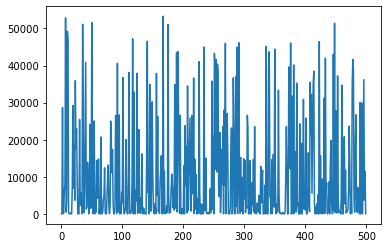

In [10]:
plt.plot(y)
plt.show()

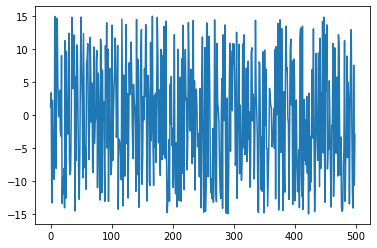

In [12]:
plt.plot(x)
plt.show()

()

In [27]:
# Design the model 
# this is basic in real life the model might be more complex
# and layers need to change
model = Sequential([
    Dense(32, kernel_initializer = "normal", activation = "relu", 
          input_shape = (1,), name = "Input"),
    
    Dense(256, kernel_initializer = "normal", activation = "relu",
         name = "First_Hidden_Layer"),
    
    Dense(512, kernel_initializer = "normal", activation = "relu",
         name = "Second_Hidden_Layer"),
    
    Dense(512, kernel_initializer = "normal", activation = "relu",
         name = "Third_Hidden_Layer"),
    
    Dense(1, kernel_initializer = "normal", activation = "relu",
         name = "Out_Layer"),
])

In [28]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 32)                64        
                                                                 
 First_Hidden_Layer (Dense)  (None, 256)               8448      
                                                                 
 Second_Hidden_Layer (Dense)  (None, 512)              131584    
                                                                 
 Third_Hidden_Layer (Dense)  (None, 512)               262656    
                                                                 
 Out_Layer (Dense)           (None, 1)                 513       
                                                                 
Total params: 403,265
Trainable params: 403,265
Non-trainable params: 0
_________________________________________________________________


In [31]:
#for regression we use mse, mae,...
model.compile(loss = "mean_squared_error",
             optimizer = Adam(),
             metrics=["mse", "mae"])

In [32]:
# Train the model
train_history = model.fit(x,y, epochs=50, batch_size = 10,
                          validation_split = 0.2,verbose=0
                         )
print(r2_score(y, model.predict(x)))

0.9985350177753578


In [38]:
history = pd.DataFrame(train_history.history)
history.head()

,loss,mse,mae,val_loss,val_mse,val_mae
0,292886208.0,292886208.0,10059.745117,306753408.0,306753408.0,10664.882812
1,178321360.0,178321360.0,8090.968750,88208936.0,88208936.0,8572.215820
2,85435816.0,85435816.0,7900.493164,82233464.0,82233464.0,7574.752441
3,81496504.0,81496504.0,7655.817383,96695392.0,96695392.0,7229.037109
4,81700104.0,81700104.0,7293.009277,73076728.0,73076728.0,7196.162598


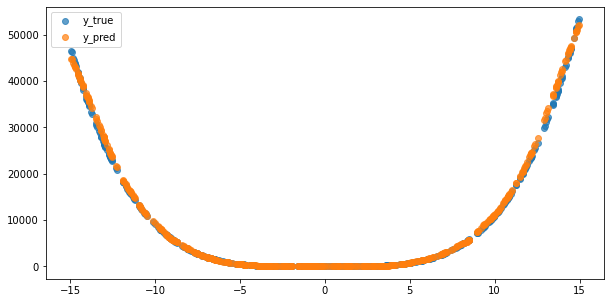

In [37]:
## Lets See in Result in Scatter Plot
plt.figure(figsize=(10,5))
plt.scatter(x, y, alpha=0.7, label = "y_true")
plt.scatter(x,model.predict(x), alpha=0.7, label ="y_pred")
plt.legend()
plt.show()

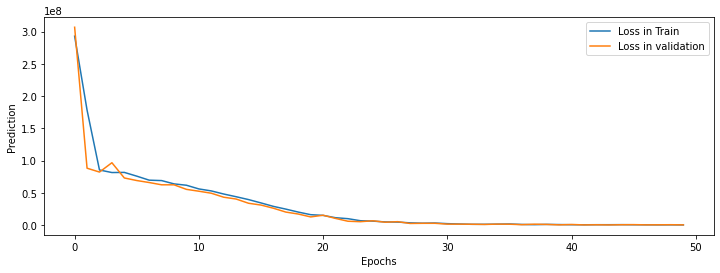

In [44]:
plt.figure(figsize=(12,4))
plt.plot(history["loss"], label = "Loss in Train")
plt.plot(history["val_loss"], label = "Loss in validation")
plt.xlabel("Epochs")
plt.ylabel("Prediction")
plt.legend()
plt.show()